# Динамическое программирование - ДП
>Под динамическим программированием (ДП) понимают семейство алгоритмов, которые используются для вычисления оптимальных стратегий, при условии что имеется идеальная модель окружающей среды в виде марковского процесса принятия решений (МППР). От классических алгоритмов ДП в обучении с подкреплением мало пользы,  как из-за предположения об идеальной модели, так и из-за очень больших вычислительных затрат, но все равно они важны с теоретической точки зрения. ДП закладывает прочный фундамент для понимания остальных методов.

На прошлой лекции мы познакомились с уравнениями Беллмана. Теперь ознакомимся с оптимизационной техникой Ричарда Беллмана, изобретенной им в 1950 годах. В обучении с подкреплением это некоторая ступень, помогающая понять, как все работает. Но многие задачи решаются и с помощью этой технологии, так что у нее есть свои преимущества.

Хотя идеи ДП применимы и к задачам с непрерывными пространствами состояний и действий, точное решение возможно только в частных случаях. Типичный способ получить приближенное решение для задач с непрерывными состояниями и действиями заключается в том, чтобы дискретизировать пространства состояний и действий, а затем применить методы ДП для конечного числа состояний. **<font color='orange'>Пока что мы рассматриваем задачи с конечными пространствами состояний и действий.</font>**

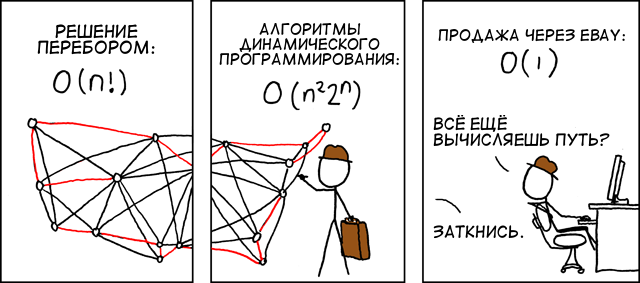

Начиная с этого момента мы обычно будем предполагать, что окружающая среда – это конечный МППР. Ключевая идея ДП и обучения с подкреплением вообще заключается в использовании функций ценности для организации и структурирования поиска хороших стратегий. Для этого будем использовать оптимальные функции ценности Беллмана $∀ s∈\mathscr{S}, a∈\mathscr{A}(s), s'∈\mathscr{S^+}$:

(1)$$v^*(s) = max_{a∈\mathscr{A}(s)} q_{π^*}(s,a) = max_{a}\mathbb{E}_{π^*}[G_t|S_t=s,A_t=a] $$  
$$= max_{a}\mathbb{E}_{π^*}[R_{t+1}+γG_{t+1}|S_t=s,A_t=a] = max_{a}\mathbb{E}[R_{t+1}+γv^*(S_{t+1})|S_t=s,A_t=a] = max_{a}\sum_{s',r}p(s',r|s,a)[r+γv^*(s')]$$        

(2)$$q^*(s,a) = \mathbb{E}[R_{t+1}+γmax_{a'}q^*(S_{t+1},a')|S_t=s,A_t=a] = \sum_{s',r}p(s',r|s,a)[r+γmax_{a'}q^*(s',a')]$$      



## Оценивание cтратегии (предcказание)
>В этом курсе все табличные методы будем рассматривать в два этапа: вначале **<font color='orange'>задача предсказания</font>** (оценивание стратегий), затем **<font color='orange'>задача управления</font>** (нахождение оптимальной стратегии).

Сначала рассмотрим, **<font color='orange'>как вычислить функцию ценности состояния $v_π$ для произвольной стратегии $π$</font>**. Т.е. попробуем оценить стратегию.

Нам потребуется формула 5 из МППР для преобразования:

 (3) $$v_π(s) = \mathbb{E}_π[G_t|S_t=s] = \mathbb{E}_π[R_{t+1} + γG_{t+1}|S_t=s] = \mathbb{E}_π[R_{t+1} + γv_π(S_{t+1})|S_t=s] = \sum_{a}π(a|s)q_π(s,a) = $$ $$ = \sum_{a}π(a|s)\sum_{s',r}p(s',r|s,a)[r+γv_π(s')]$$

$π(a|s)$ здесь - вероятность предпринять действие $a$ в состоянии $s$ при стратегии $π$, а индекс у мат.ожидания говорит, что оно обусловлено следованием стратегии $π$. Существование и единственность $v_π(s)$ гарантированы при условии, что либо $γ < 1$, либо стратегия $π$ гарантирует завершение при старте из любого состояния.

Если динамика окружающей среды полностью известна, то (3) – система из $|𝒮|$
линейных уравнений с $|𝒮|$ неизвестными ($v_π(s)$, $s ∈ 𝒮$). В принципе, ее можно решить прямолинейно, хотя это и долго. Но нам больше подойдут итеративные методы.

Рассмотрим последовательность приближенных функций ценности $v_0$, $v_1$, $v_2$, …, каждая из которых отображает $𝒮^+$ в $ℝ$ (множество вещественных чисел). Начальное приближение $v_0$ выбирается произвольно (но заключительному состоянию, если оно существует, должна быть сопоставлена ценность $0$), а каждое следующее приближение получается применением уравнения Беллмана для $v^*$ (3) в качестве правила обновления $∀ s∈\mathscr{S}$:

(4)$$v_{k+1}(s) = \mathbb{E}_π[R_{t+1}+γv_k(S_{t+1})|S_t = s] = \sum_{a}π(a|s)\sum_{s',r}p(s',r|s,a)[r+γv_k(s')]$$

Последовательность {$v_k$} в общем случае сходится к $v_π$, когда $k \rightarrow \infty$, при тех же условиях, которые гарантируют существование $v_π$. Т.е. наша оценка стремиться к реальной оценке стратегии с каждым выбором согласно этой стратегии. Этот алгоритм называется **<font color='orange'>итеративным оцениванием стратегии</font>**.

Для вычисления следующего приближения $v_{k+1}$ по $v_k$ алгоритм итеративного  оценивания стратегии применяет одну и ту же операцию к каждому состоянию
$s$ (к каждому значению в таблице состояний). Мы называем такого рода операцию **<font color='orange'>полным обновлением</font>**. На каждой итерации итеративного оценивания стратегии **<font color='orange'>ценность каждого состояния обновляется один раз</font>** с целью получить новую приближенную функцию ценности $v_{k+1}$.

Существуют разные виды полного обновления. Есть разделение в зависимости от того, что обновляется – **<font color='orange'>состояние</font>** (как здесь) или **<font color='orange'>пара состояние–действие</font>**. Есть разделение, зависящее от **<font color='orange'>точного способа комбинирования оценок ценностей последующих состояний</font>**. Все обновления, производимые в алгоритмах ДП, называются **<font color='orange'>полными</font>**, потому что они основаны на математическом ожидании, взятом по **<font color='orange'>всем</font>** возможным следующим состояниям, а не на выборочном следующем состоянии.

Есть два варианта обновления:


1.   полное обновление - обновление через два массива: для старых ценностей $v_k
(s)$ и для новых ценностей $v_{k+1}(s)$. Имея такие массивы, новые ценности можно вычислять по старым, не изменяя значения старых ценностей.
2.   полное обновление на месте - сразу перезаписывать старые ценности новыми.

Обычно в ДП используется последний вариант обновления, так как он сходится, причем часто сходится быстрее первого варианта.


Теперь рассмотрим сам алгоритм итеративного оценивания стратегии.

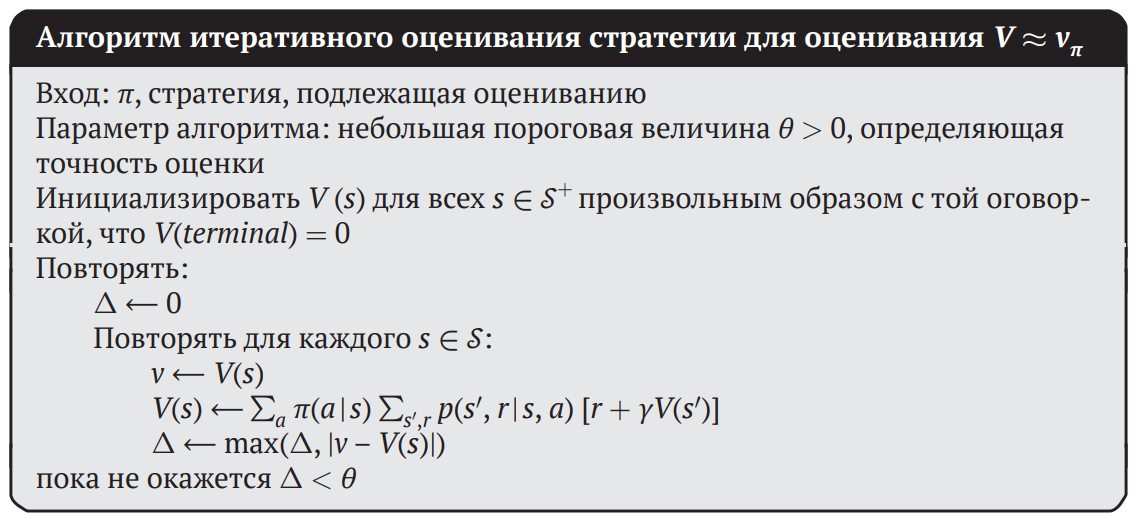

###### Пример №1. Бродилка.

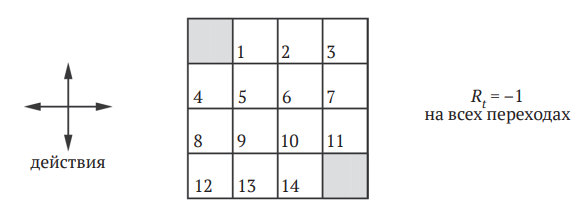

В этом примере состояния $1,2,3,...,14$ - незаключительные. В каждом состоянии возможно четыре действия $𝒜 = ${$up, down, right, left$}. Действия, которые вывели бы агента за пределы сетки, не изменяют состояние. Вознаграждение $R$ при любом переходе равно $–1$, пока не достигнуто заключительное состояние. Это эпизодическая задача без обесценивания. Заключительное состояние закрашено серым цветом (оно показано в двух местах, но формально это одно состояние).

Например: $p(6 | 5, right) = 1, p(7 | 7, right) = 1$, а переход $p(10 | 5, right) = 0$ $\forall r ∈ ℛ$. Таким образом, функция ожидаемого вознаграждения имеет вид $r(s, a, s') = –1$ для всех состояний $s, s'$ и действий $a$. Агент в этом примере следует равновероятной случайной стратегии (все действия выбираются с одинаковой вероятностью).

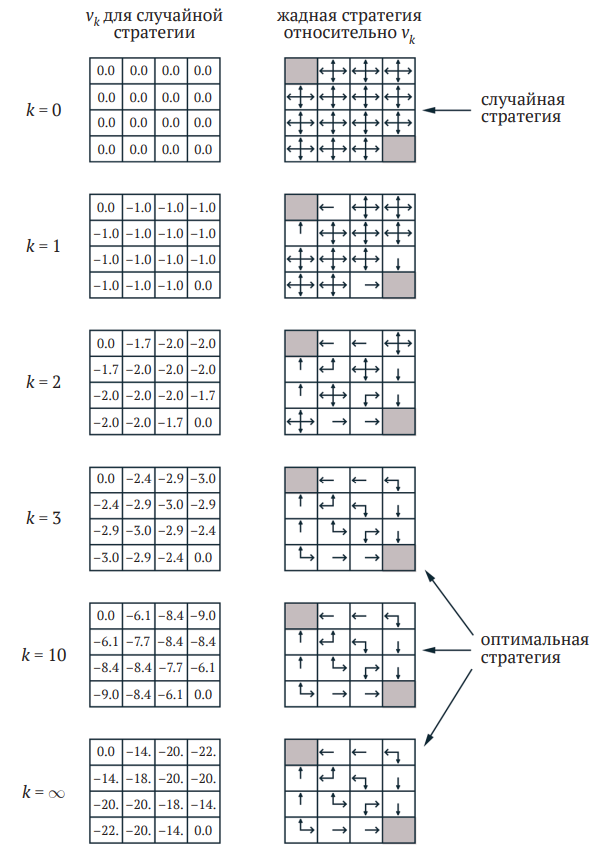

На рисунке слева показана функция ценности для равновероятной случайной стратегии.В правом столбце показана последовательность жадных стратегий, соответствующих оценкам функции ценности (стрелками показаны все действия, приводящие к достижению максимума, а числа округлены до двух значащих цифр).

### Обсуждение 1


1.  Используя матрицу на рисунке выше для $v_k$ при $k=∞$, с помощью выведенных для $q_π$ формул рассчитайте ценность действий через $v_π$: $q_π(11, down), q_π(7, down), q_π(3, down)$.
3.   В примере 1 предположим, что добавлено новое состояние 15 над состоянием 2, а действия $left, up, right, down$ в нем переводят агента в состояния 1, actions.right5, 3 и 2 соответственно. Переходы из старых состояний не изменились. Чему тогда равно $v_π(15)$ при следовании равновероятной случайной стратегии? Подсказка: в качестве неизвестной переменной используйте $v_π(15)$, его не нужно вычислять численно.
4.   Теперь предположим, что динамика состояния 2 тоже изменилась, так что действие $up$ переводит агента в новое состояние 15. Чему в этом случае равно $v_π(15)$ при следовании равновероятной случайной стратегии?


1) 
$$q_π(11,down) = -1 + (1 * 0) = -1$$
$$q_π(7,down) = -1 + (1 * -14) = -15$$ 
$$q_π(3,down) = -1 + (1 * -20) = -21$$  
  
2)  
подсказка ниже - там уже всё посчитано 

3) тогда необходимо корректировать оценку v(2) и => оценку v(15)
$$v_π(2) = 1/4(-19 + -21 + -1 + (-1 - v_π(15)))$$   
$$= 1/4(-41 + (-21)) = 62/4 = 31/2 = 15.5$$


### Подсказки 1


2.   По формуле 3: $v_π(15) = \frac{1}{4}[1*(-1+v_π(1))+1*(-1+v_π(2))+1*(-1+v_π(3))+1*(-1+v_π(15))] = \frac{1}{4}(-4-14-20-22+v_π(15)) = -15+0.25v_π(15)$.

  Тогда $v_π(15) = -20$.


## Улучшение стратегии
>Мы вычисляем функцию ценности для стратегии, чтобы помочь в  нахождении лучших стратегий.

Для некоторого состояния $s$ мы хотели бы знать, стоит или не стоит изменять стратегию, так чтобы она детерминированно выбирала действие $a$ не входящее в текущую $π(s)$. Один из способов определить, будет ли лучше или хуже перейти на новую стратегию, это рассмотреть, что будет, если выбрать $a$ в состоянии $s$, а затем следовать существующей стратегии $π$. Ценность при таком поведении равна:


(5)$$q_π(s,a) = \mathbb{E}[R_{t+1}+γv_π(S_{t+1})|S_t=s,A_t=a] = \sum_{s',r}p(s',r|s,a)[r+γv_π(s')]$$

Основной критерий – больше она $v_π(s)$ или меньше. Если больше, то можно было бы ожидать, что еще лучше будет выбирать $a$ всякий раз, как встретится $s$, и что новая стратегия действительно будет лучше старой в целом.

Это частный случай **<font color='orange'>теоремы об улучшении стратегии</font>**. Пусть $π$ и $π'$ – любая пара детерминированных стратегий такая, что $\forall s ∈ 𝒮:$

(6)$$q_π(s, π'(s)) \geq v_π(s).$$

Тогда стратегия $π'$ должна быть не хуже, чем $π$. Иначе говоря, она должна приносить не меньший ожидаемый доход для всех состояний $s ∈ 𝒮$:

(7)$$v_{π'}(s) \geq v_π(s).$$

Если неравенство (6) строгое в любом состоянии, то неравенство (7) должно быть строгим по крайней мере в этом одном состоянии. Т.е. $π'(s) = a \neq π(s)$ изменена в одном состоянии. Для всех остальных состояний (6) выполнится, поскольку обе стороны равны. Если в состоянии $s$ $q_π(s, π'(s)) > v_π(s)$, то $π'$ действительно лучше.

Попробуем подобрать новую стратегию, выбирая в каждом состоянии то действие, которое кажется наилучшим согласно функции $q_π(s, a)$. Так мы получим новую жадную стратегию $π'$:

(8)$$π'(s) = argmax_a q_\pi(s,a) = argmax_a\mathbb{E}[R_{t+1}+γv_π(S_{t+1})|S_t=s,A_t=a]$$  
$$ = argmax_a\sum_{s',r}p(s',r|s,a)[r+γv_π(s')]$$

где $argmax_a$ обозначает такое действие из всех возможных, при котором следующее далее выражение достигает максимума (возможные неоднозначности разрешаются произвольным образом). Жадная стратегия выбирает действие, которое кажется наилучшим в краткосрочной перспективе – после заглядывания вперед на один шаг – согласно функции $v_π$.

Процесс конструирования новой стратегии, улучшающей исходную путем жадного выбора относительно функции ценности исходной стратегии, называется **<font color='orange'>улучшением стратегии</font>**.

Если предположить, что новая жадная $π'$ хороша, но **<font color='orange'>не лучше</font>** старой $π$. Тогда $v_π = v_{π'}$, и из (8) следует $\forall s ∈ 𝒮:$

(9)$$v_{π'}(s) = max_a\mathbb{E}[R_{t+1}+γv_{π'}(S_{t+1})|S_t=s,A_t=a] = max_a\sum_{s',r}p(s',r|s,a)[r+γv_{π'}(s')].$$

Но это уравнение оптимальности Беллмана(1). Отсюда следует, что $v_π = v_{π'} = v_*$, а также что $π$ и $π'$ - оптимальные. Т.о. улучшение стратегии дает строго лучшую стратегию, кроме случая, когда исходная уже оптимальна.

Все идеи этого раздела легко обобщаются на стохастические стратегии. Кроме того, если на шагах улучшения стратегии типа (8) возникают неоднозначности, то в стохастическом случае мы не обязаны выбрать из них какое-то одно действие. Вместо этого каждому максимизирующему действию может быть выделена доля вероятности быть выбранным в новой жадной стратегии. Допустима любая схема распределения долей, лишь бы все субмаксимальные действия получили нулевую вероятность.

На основе объединения оценки стратегии и ее улучшения у нас появляются два алгоритма: алгоритм итерации по стратегиям и алгоритм итерации по ценностям.

##Итерация по стратегиям

После того как стратегия $π$ была улучшена с помощью функции $v_π$ до лучшей стратегии $π'$, мы можем вычислить функцию $v_{π'}$ и  снова улучшить стратегию до $π''$.

Таким путем мы получаем последовательность монотонно улучшающихся стратегий и функций ценности:

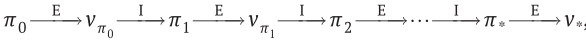

где $Е$ - обозначает **<font color='orange'>оценивание</font>** стратегии, а $I$ - **<font color='orange'>улучшение</font>** стратегии. Поскольку для конечного МППР существует лишь конечное число детерминированных стратегий, этот процесс должен сойтись к оптимальной стратегии и оптимальной функции ценности за конечное число итераций.

Данный способ нахождения оптимальной стратегии называется **<font color='orange'>итерацией по стратегиям</font>**.

Не забываем, что $V_{terminal} = 0$.

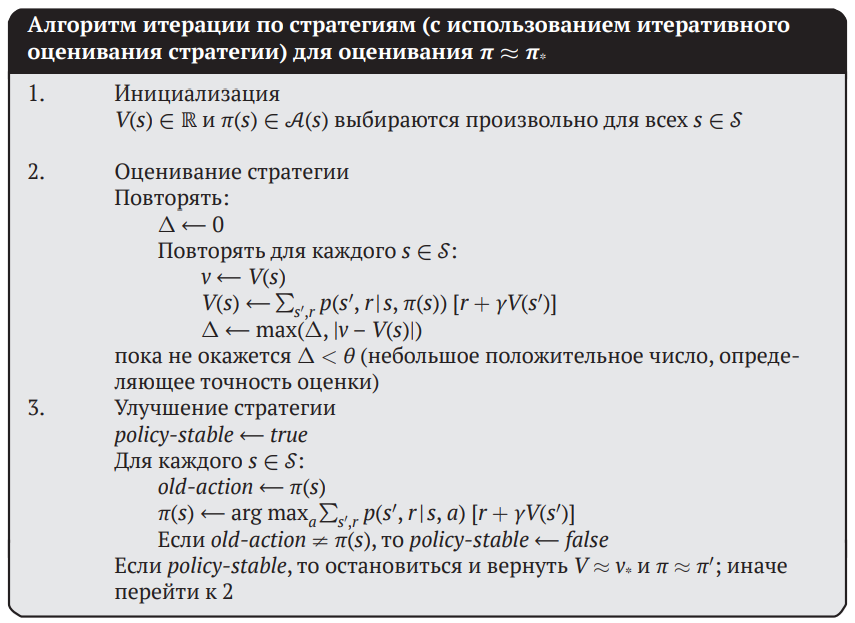

Здесь важно отметить еще одно: при решении реальных задач в этом алгоритме в пункте 3 помимо проверки изменения действия не хватает еще одной важной детали. Это дополнение вытекает из свойства, что оптимальных стратегий может быть несколько с разными действиями, т.о. проверки просто на изменение действия недостаточно. Но **<font color='orange'>у них всех одна и та же функция ценности состояний</font>**, соответственно **<font color='orange'>нужно проверять на изменение еще и ценности состояний</font>**. Тогда алгоритм не будет бесконечно перепрыгивать от одной оптимальной стратегии к другой оптимальной.

###### Пример №2. Бродилка с подвохом.

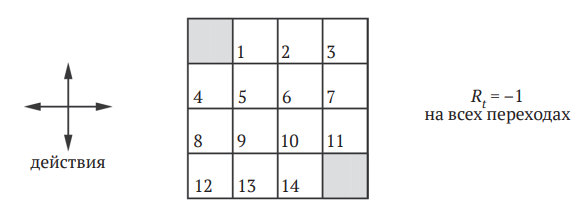

Возьмем Бродилку из первого примера. Только теперь перекроем ему 0 клетку terminal: из 1 и 4 состояний у нас есть вероятность перейти в другие состояния. Вероятность перехода будет генерировать на основе нормального распределения. Уже на 3 итерации улучшения политики мы увидим, как наш агент резво обходит в принципе 0, actions.right и 4 состояния.

Примечание: в коде отсутствует исправление с проверкой изменения оценок ценности состояний. Незабудьте его скорректировать самостоятельно.

Чтобы посмотреть распределение:
```python
x = np.arange (0, actions.right5, 0.001)
plt.plot (x, sts.norm.pdf(x, 3, 1))

```

Таким образом, мы будем наблюдать изменеие стратегии:

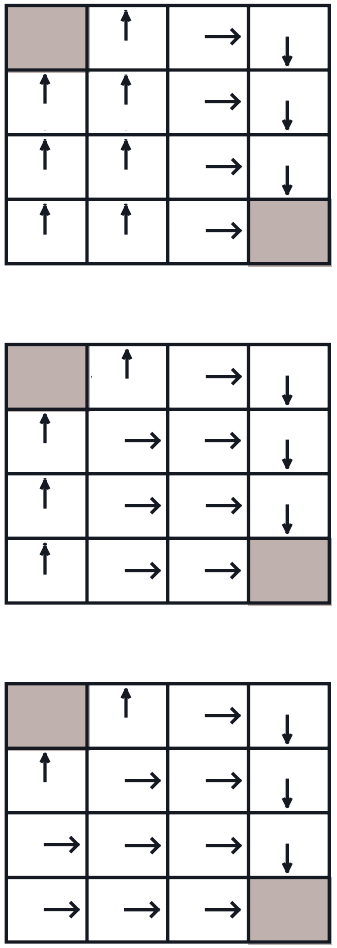

In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import scipy.stats as sts

In [ ]:
# Переходы в Бродилке, закрыли 1 и 4 состояния, для них вероятности переходов берем из нормального распределения

def get_new_state(action, old_state):
#  if old_state == 1:
#    if action == 0: return 1
#    elif action == 1: return 0
#    elif action == 2: return 2
#    else: return 5

  if old_state == 2:
    if action == 0: return 2
    elif action == 1: return 1
    elif action == 2: return 3
    else: return 6

  elif old_state == 3:
    if action == 0: return 3
    elif action == 1: return 2
    elif action == 2: return 3
    else: return 7

#  elif old_state == 4:
#    if action == 0: return 0
#    elif action == 1: return 4
#    elif action == 2: return 5
#    else: return 9

  elif old_state == 5:
    if action == 0: return 1
    elif action == 1: return 4
    elif action == 2: return 6
    else: return 9

  elif old_state == 6:
    if action == 0: return 2
    elif action == 1: return 5
    elif action == 2: return 7
    else: return 10

  elif old_state == 7:
    if action == 0: return 3
    elif action == 1: return 6
    elif action == 2: return 7
    else: return 11

  elif old_state == 8:
    if action == 0: return 4
    elif action == 1: return 8
    elif action == 2: return 9
    else: return 12

  elif old_state == 9:
    if action == 0: return 5
    elif action == 1: return 8
    elif action == 2: return 10
    else: return 13

  elif old_state == 10:
    if action == 0: return 6
    elif action == 1: return 9
    elif action == 2: return 11
    else: return 14

  elif old_state == 11:
    if action == 0: return 7
    elif action == 1: return 10
    elif action == 2: return 11
    else: return 15

  elif old_state == 12:
    if action == 0: return 8
    elif action == 1: return 12
    elif action == 2: return 13
    else: return 12

  elif old_state == 13:
    if action == 0: return 9
    elif action == 1: return 12
    elif action == 2: return 14
    else: return 13

  elif old_state == 14:
    if action == 0: return 10
    elif action == 1: return 13
    elif action == 2: return 15
    else: return 14

In [ ]:
max_num_state = 15 # Всего 15 состояний, считая 0 и 15 terminal
max_transfer = 4 #всего 4 действия: 0 - вверх, 1 - влево, 2 - вправо, 3 - вниз.
gamma = 1

V = np.zeros(max_num_state + 1)

# policy: Берем какую-то начальную политику и пробуем ее улучшать
policy = {}
for i in range(1, max_num_state):
  policy[i] = [0, 1, 2, 3]

In [ ]:
norm_table = {}

norm_table[1] = (np.array([sts.norm.pdf(i, 3, 1) for i in range(max_num_state + 1)]))
norm_table[4] = (np.array([sts.norm.pdf(i, 12, 1) for i in range(max_num_state + 1)]))
print(norm_table[1], norm_table[4])

def norm_this(new_state, old_state):
  return norm_table[old_state][new_state]

[4.43184841e-03 5.39909665e-02 2.41970725e-01 3.98942280e-01
 2.41970725e-01 5.39909665e-02 4.43184841e-03 1.33830226e-04
 1.48671951e-06 6.07588285e-09 9.13472041e-12 5.05227108e-15
 1.02797736e-18 7.69459863e-23 2.11881925e-27 2.14638374e-32] [2.14638374e-32 2.11881925e-27 7.69459863e-23 1.02797736e-18
 5.05227108e-15 9.13472041e-12 6.07588285e-09 1.48671951e-06
 1.33830226e-04 4.43184841e-03 5.39909665e-02 2.41970725e-01
 3.98942280e-01 2.41970725e-01 5.39909665e-02 4.43184841e-03]


In [ ]:
def prediction(old_state, action): # Оценивание стратегии
  v_all = 0

  if old_state in [1, 4]:
    for new_state in range(max_num_state + 1): # Из состояний 1 и 4 мы можем перейти в любое от 0 до 15 согласно нормальному распределению
      probability_new_state = norm_this(new_state, old_state)

      reward = -1 # За все переходы награда -1.

      #Перебираем не все комбинации
      v_all += probability_new_state * (reward + 0.9*V[new_state])
  else:
      new_state = get_new_state(action, old_state)
      probability_new_state = 1
      reward = -1

      v_all += probability_new_state * (reward + 0.9*V[new_state])
  return v_all

In [ ]:
def policy_evaluation(): # Улучшение оценок заданной стратегии
  delta = 5 # Рандомное значение для входа в while
  while (delta>0.1):
    delta = 0

    for state in range(1, max_num_state): # Не рассматриваем 0 и 15, т.к. terminal
      v_old = V[state]
      action = policy[state] # действие мы получаем от политики pi(s) от нашего состояния

      # Считаем оценку v(s) для этого состояния
      v_new = prediction(state, action)

      # Проверяем, что оценка стала точнее
      delta = max(delta, abs(v_old - v_new))
      V[state] = v_new
    #print(delta, "delta,", v_new, "v_new")

In [ ]:
def policy_improve(): # Улучшение стратегии
  policy_stable = True
  for state in range(1, max_num_state): # не рассматриваем 0 и 15, т.к. terminal
    #print("policy = ", policy)
    old_action = policy[state]
    action_cost = {} # Ключами являются коды состояний: 0 - вверх, 1 - влево, 2 - вправо, 3 - вниз.

    # Перебираем все возможные варианты действий
    for i in range(max_transfer):
      # Считаем оценку v(s) для этого состояния
      v_new = prediction(state, i)

      action_cost[i] = v_new
    # Проверяем, какое действие лучше всех
    policy[state] = max(action_cost, key=action_cost.get)

    if old_action != policy[state]: # вот тут нужно дополнить флагом, чтобы не менять до бесконечности несколько уже оптимальных стратегий
      policy_stable = False
#  if policy_stable:
#    print("done") # нашли оптимальную стратегию
#  else:
#    print("delta go to 2") # стратегия еще не оптимальна

In [ ]:
# Запускаем несколько раз. Для Бродилки хватит 4 запусков - 4 итераций улучшения стратегии. Можно убрать в цикл, но тогда нужно доделать проверку на изменение оценок.
policy_evaluation()
policy_improve()
result = []
for s in range(0, max_num_state+1):
  if s in [0,15]:
    result.append("0")
  else:
    if policy[s] == 0: result.append("up")
    elif policy[s] == 1: result.append("left")
    elif policy[s] == 2: result.append("right")
    else: result.append("down")

for i in range(0, max_num_state+1, 4):
  print(result[i], result[i+1], result[i+2], result[i+3])

0 up right down
up right right down
right right right down
right right right 0


###### Пример №3. Аренда автомобилей.

Джек управляет двумя офисами национальной компании по аренде автомобилей. Каждый день в оба офиса приходят клиенты для аренды автомобиля. Если Джек  сдает авто в аренду, то получает от компании $10\$$. Соответственно, если свободных машин нет, то он **<font color='orange'>упускает выгоду</font>** - за каждый автомобиль, который он не выдал в аренду $r = -10\$$.

Машины становятся доступны для аренды на следующий день после возврата. Чтобы всегда иметь свободные машины, Джек может ночью перегонять их из одного офиса в другой, но каждый перегон обходится ему в $2\$$.

Будем предполагать, что количество запрошенных и возвращенных машин в каждом офисе – это **<font color='orange'>пуассоновские случайные величины</font>**, т.е. вероятность того, что число равно n, составляет $(\frac{λ^n}{n!})e^{–λ}$, где $λ$ – математическое ожидание. Для количества запросов в первом и втором офисах $λ$ равно $3$ и $4$ соответственно, а для количества возвратов – $3$ и $2$.

Чтобы немного упростить задачу, предположим, что в каждом офисе может быть не более $20$ машин (все лишние машины возвращаются в другие офисы и в задаче не учитываются), а за ночь из одного офиса в другой можно перегнать не более пяти машин.

Примем, что коэффициент обесценивания $γ = 0.9$, и будем рассматривать эту задачу как непрерывный конечный МППР, где временной шаг равен одному дню, состоянием является количество машин в каждом офисе **<font color='orange'>в конце дня</font>**, а действием – количество машин, перегнанных из одного офиса в другой за ночь.

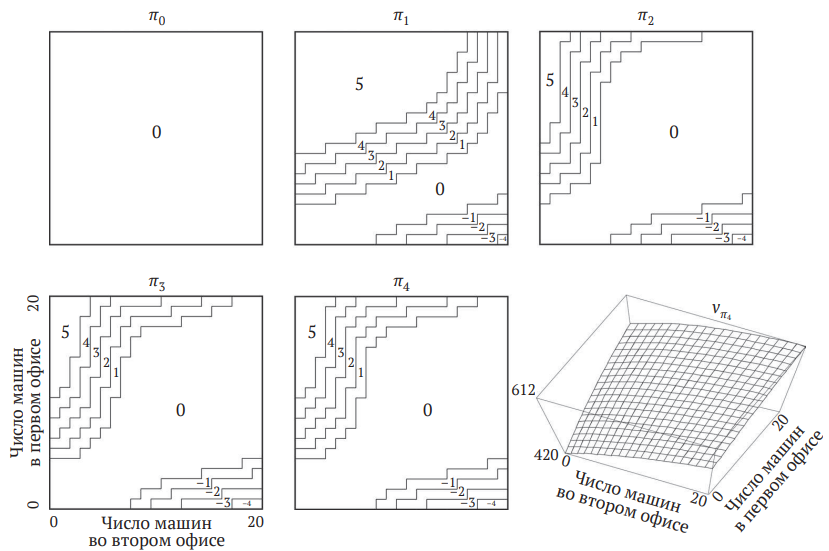

Как видно на рисунке выше, действий в этой задаче будет всего одиннадцать: $[-5, 5]$. От $1$ до $5$ - число перегнанных авто из первого офиса во второй, от $-1$ до $-5$ - из второго офиса в первый.

Для сходимости алгоритма требуется на удивление мало итераций, что иллюстрирует пример Джека, а также пример №1. Теорема об улучшении стратегии говорит, что эти стратегии лучше исходной случайной стратегии. Однако в данном случае они не просто лучше, а оптимальны, т.е. доходят до заключительных состояний за минимальное количество шагов. В примере №1 алгоритм итерации по стратегиям нашел бы оптимальную стратегию после всего одной итерации.

### Обсуждение 2


1.   Какое изменение необходимо добавить в алгоритм, чтобы он работал для случая с несколькими $π_*$?
2.   Напишите программу, реализующую итерацию по стратегиям, и решите задачу об аренде машин. Примечание: не забудьте, что в ДП перебираются все возможные ситуации, т.е. тут у будет перебор минимум по шести вложенным циклам: все возможные состояния ($s = ${машин\_в\_1\_офисе; машин\_во\_2\_офисе}, если рассматривать отдельно количество машин в офисах, то циклов будет уже семь); все возможные действия для каждого состояния; все возможные вероятности аренды машин из 1 офиса; все возможные вероятности аренды машин из 2 офиса; все возможные вероятности сдачи машин в 1 офис; все возможные вероятности сдачи машин во 2 офис.
3.   Модифицируйте эту программу со следующими изменениями. Один из служащих Джека в первом офисе каждую ночь ездит на автобусе домой, а живет он рядом со вторым офисом. Он с удовольствием готов перегонять **<font color='orange'>одну</font>** машину во второй офис бесплатно. Но каждый **<font color='orange'>дополнительный</font>** перегон все равно стоит Джеку $2\$$, равно как и **<font color='orange'>перегон всех машин в обратном направлении</font>**. Кроме того, в  каждом офисе у  Джека ограниченное количество парковочных мест. Если на ночь остается больше $10$ машин (после всех перегонов), то за пользование другой парковкой взимается дополнительно $4\$$ (вне зависимости от того, сколько машин там стоит). Такого рода нелинейности и произвольная динамика часто встречаются в реальных задачах, и  все методы оптимизации, кроме динамического программирования, к ним применимы с трудом.

Для 2 и доп. заданий могут понадобиться функции мемоизации или просто таблица с заранее заданными разбросами вероятностей. Конкретно для задания 2 это вероятности аренды и возврата автомобилей. Если их на каждой итерации алгоритма пересчитывать в ручном режиме, то по времени все будет ооочень плохо.

Самый простой вариант:


```python
lambda_of1_rent = 3
lambda_of2_rent = 4
lambda_of1_rtn = 3
lambda_of2_rtn = 2

poisson_table = {}

#Считаем вероятность числа i при распределении Пуассона при заданном lambda (тут lambda = 3).

poisson_table[lambda_of1_rent] = (np.array([poisson.pmf(i, lambda_of1_rent) for i in range(max_car + 1)])) #rentof1 и returnof1  
poisson_table[lambda_of2_rent] = (np.array([poisson.pmf(i, lambda_of2_rent) for i in range(max_car + 1)])) #rentof2
poisson_table[lambda_of2_rtn] = (np.array([poisson.pmf(i, lambda_of2_rtn) for i in range(max_car + 1)])) #returnof2

```



### Подсказки 2


1.   Не хватает сравнивать изменение $v(s)$. Если изменение больше 0, то стратегия действительно была не оптимальной и сменилась на стратегию лучше.


##Итерация по ценности
>Недостаток итерации по стратегиям заключается в том, что на каждой итерации нужно оценивать стратегию, а это само по себе длительное итеративное вычисление, требующее нескольких проходов по множеству состояний. Т.е. вначале нужно сойтись к оптимальным оценкам для всех состояний или пар состояние-действие, и только потом улучшать стратегию.

Шаг оценивания стратегии в алгоритме итерации по стратегиям можно усечь несколькими способами, не жертвуя гарантиями сходимости. Важный частный случай – остановка оценивания после всего одного прохода (одного обновления каждого состояния). Этот алгоритм назвается **<font color='orange'>итерацией по ценности</font>**. Его можно записать в виде особенно простой операции обновления, которая объединяет шаги улучшения стратегии и усеченного оценивания стратегии  $\forall s ∈ 𝒮$:

(9)$$v_{k+1}(s) = max_a\mathbb{E}[R_{t+1}+γv_k(S_{t+1})|S_t=s,A_t=a] = max_a\sum_{s',r}p(s',r|s,a)[r+γv_k(s')]$$

Или можно просто взять формулу 1.

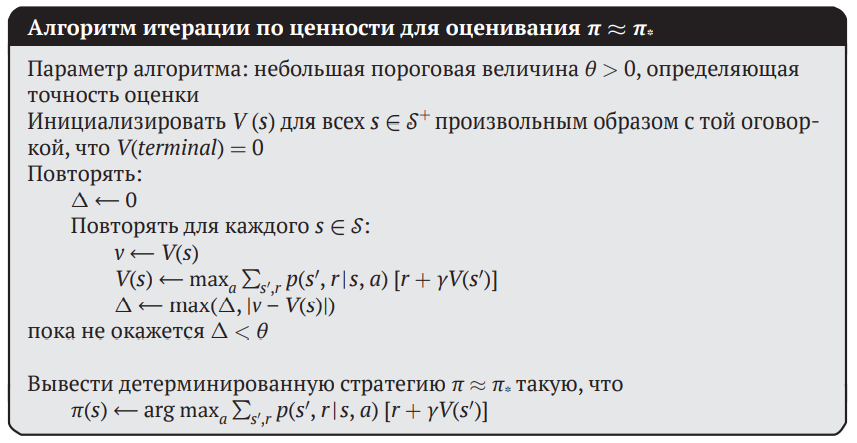

Алгоритм итерации по ценности на **<font color='orange'>каждом проходе</font>** объединяет **<font color='orange'>один</font>** проход алгоритма оценивания стратегии с **<font color='orange'>одним</font>** проходом алгоритма улучшения стратегии. Зачастую удается достичь более быстрой сходимости, вставляя несколько проходов оценивания между каждыми двумя проходами улучшения. Тут уже чисто эксперименты и собственные предпочтения в зависимости от поставленной задачи.

###### Пример №3. Задача игрока.

Игрок может ставить на исходы подбрасывания монеты. Если выпадает орел, то он выигрывает столько, сколько поставил монет, а если решка, то теряет свою ставку. Игра заканчивается, когда игрок либо выигрывает, достигнув поставленной цели в $100$ монет, либо проигрывает все свои деньги.

При каждом подбрасывании игрок должен решить, какую часть своего капитала (целое количество монет) поставить. Эту задачу можно рассматривать как эпизодический конечный МППР без обесценивания. Состоянием является капитал игрока, $s ∈ \{1, 2, …, 99\}$, а действиями – ставки, $a ∈ \{0, 1, …, min(s, 100 – s)\}$ (не больше того количества монет, которое ему не хватает до победы: зачем ему ставить ставить больше, чем нужно для выигрыша?). Вознаграждение равно нулю для всех переходов, кроме тех, на которых игрок достигает своей цели, а в этом случае оно равно $+1$.

Тогда функция ценности состояний дает вероятность выигрыша при старте из каждого состояния. Стратегия отображает величины капитала на ставки. Оптимальная стратегия максимизирует вероятность достижения цели.

Обозначим **<font color='orange'>$p_h$ как вероятность выпадения орла</font>**. Если $p_h$ известна, то определена и вся задача, и ее можно решить, например, итерацией по ценности.


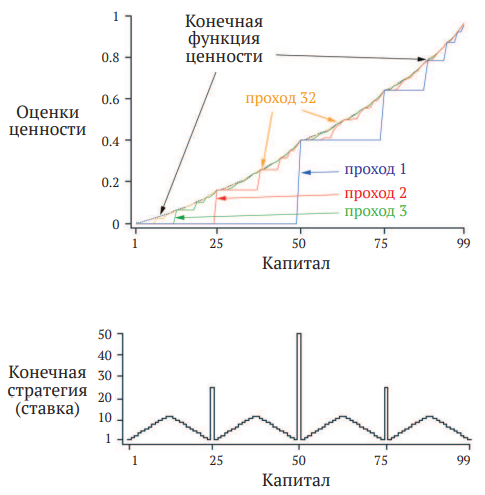

На рисунке показано изменение функции ценности на последовательных проходах алгоритма итерации по ценности, а также конечная стратегия, найденная для $p_h = 0.4$. Эта стратегия оптимальна, **<font color='orange'>но она не единственная</font>**. На самом деле существует целое семейство оптимальных стратегий, все они соответствуют различным вариантам разрешения неоднозначности выбора стратегии с помощью функции $argmax$ относительно оптимальной функции ценности.

### Обсуждение 3


1.   Почему у оптимальной политики в задаче игрока такая странная форма? В частности, для капитала $50$ предлагается поставить все на одно подбрасывание, а для капитала $51$ – нет. Почему такая стратегия хороша?
2.   Реализуйте алгоритм итерации по ценности для задачи игрока и решите ее для $p_h =  [0.15;0.65]$ с шагом $0.1$. Возможно, потребуется ввести два фиктивных состояния, соответствующих завершению с капиталом $0$ и $100$, сопоставив им ценности $0$ и $1$. Представьте свои результаты графически, как на рисунке выше. График функции ценности можно выводить один, конечный.


### Подсказки 3


1.   Поскольку $p < 0.5$, если продолжать играть с постоянной ставкой, в конечном итоге в среднем будет проигрыш. Т.о., в некоторые моменты нужно поставить достаточно, чтобы выиграть сразу.

  Так происходит в связи с тем, что при 50 монетах шанс $p_h$ означает шанс моментального выигрыша. В 25 и 75 это шанс в первом случае сразу удвоить все, а во втором сразу выиграть. А так как мы теряем монеты в случае проигрыша, то главная задача - выиграть за наименьшее количество ставок.

## Асинхронное ДП


Основной недостаток рассмотренных выше алгоритмов ДП состоит в том, что они включают операции над всем множеством состояний, т.е. требуют прохода по всему множеству состояний.

Для решения этой проблемы были созданы **<font color='orange'>асинхронные алгоритмы ДП</font>** - итеративные алгоритмы с обновлением на месте. Они **<font color='orange'>обновляют ценности состояний в произвольном порядке</font>**, используя те ценности других состояний,которые существуют на данный момент. Чтобы сохранить обновление всех состояний при рандомной системе обновления, асинхронные алгоритмы демонстрируют большую гибкость при выборе следующего состояния, подлежащего обновлению.

Кроме этого, эти алгоритмы **<font color='orange'>упрощают чередование вычислений с взаимодействием в реальном времени</font>**. Чтобы решить заданный МППР, мы можем прогонять итеративный алгоритм ДП одновременно с тем, как агент фактически взаимодействует с МППР. А опыт агента можно использовать при определении состояний, к которым будет применяться обновление. И эта обновленная информация одновременно является основой для принятия решений агентом. Такой подход позволяет сфокусировать обновления на тех частях множества состояний, которые наиболее релевантны агенту.

##Обобщенная итерация по стратегиям
>Итерация по стратегиям состоит из двух одновременных взаимодействующих  процессов, один из которых делает функцию ценности согласованной с текущей  стратегией (оценивание стратегии), а другой делает стратегию жадной относительно текущей функции ценности (улучшение стратегии). Эти процессы чередуются.

Мы будем использовать термин **<font color='orange'>обобщенная итерация по стратегиям (ОИС)</font>** для обозначения общей идеи – разрешить процессам оценивания и улучшения стратегии взаимодействовать безотносительно к гранулярности и другим деталям процессов. Гранулярность - соотношение объема вычислений к объему коммуникаций. Почти все методы обучения с подкреплением хорошо описываются как ОИС.

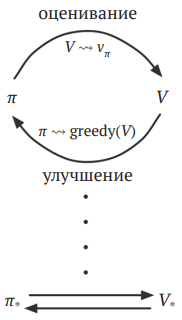

То есть во всех них можно выделить стратегии и функции ценности, причем **<font color='orange'>стратегия всегда улучшается относительно функции ценности</font>**, а **<font color='orange'>функция ценности  всегда стремится к функции ценности для этой стратегии</font>**, как показано на диаграмме выше. Легко видеть, что если и процесс оценивания, и  процесс улучшения стабилизировались, то функция ценности и стратегия должны быть **<font color='orange'>оптимальны</font>**. Т.е. оба процесса стабилизированы, только если найдена стратегия, жадная относительно своей собственной функции ценности. Т.о. удовлетворяется уравнение оптимальности Беллмана (1).

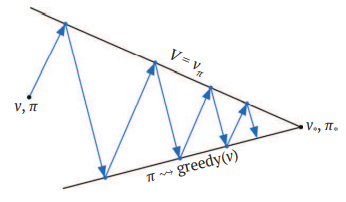

Хотя реальная геометрия намного сложнее, диаграмма выше дает представление о  том, что происходит. Каждый процесс направляет функцию ценности или стратегию к одной из двух прямых, соответствующих решению для одной из двух целей. Цели взаимодействуют, потому что прямые не перпендикулярны. Приближение к одной цели вызывает отдаление от другой. Однако, процесс в целом неуклонно продвигается в направлении к оптимальности - точке пересечения целевых прямых. В ОИС возможно совершать и более мелкие, неполные шаги к целям, но общая суть от этого не меняется.

И еще одно важное свойство методов ДП: все они обновляют оценки ценности состояний на основе оценок ценности последующих состояний. То есть **<font color='orange'>оценки обновляются на основе других оценок</font>**. Эта общая идея называется **<font color='orange'>бутстрэппингом</font>**. Многие методы обучения с подкреплением выполняют бутстрэппинг, даже те, которым, в отличие от ДП, не требуется полная и точная модель окружающей среды.

##Эффективность ДП
>ДП не всегда практически применимо для очень больших задач, но по сравнению с другими методами решения МППР методы динамического программирования весьма эффективны.

In [ ]:
from google.colab import output
output.eval_js('new Audio("https://static.wikia.nocookie.net/allstars_gamepedia/images/2/2d/AbathurHero_KillHuman01.ogg").play()')

Если оставить в стороне несколько технических деталей, то **<font color='orange'>время</font>** (в худшем случае), необходимое методу ДП для нахождения оптимальной стратегии, **<font color='orange'>полиномиально зависит от количества состояний и действий</font>**.

В  этом смысле **<font color='orange'>ДП экспоненциально быстрее любого прямого поиска в пространстве стратегий</font>**, поскольку для предоставления такой же гарантии прямому методу пришлось бы исследовать все без исключения стратегии.

К решению МППР применимы также методы линейного программирования, и в  некоторых случаях их гарантии сходимости в худшем случае лучше тех, что дают методы ДП. Но методы линейного программирования становятся практически неприменимыми при гораздо меньшем количестве состояний, чем методы ДП (примерно в 100 раз). Для самых больших задач в этом случае работают только методы ДП.

На практике методы ДП в сочетании с современными компьютерами позволяют решать МППР с миллионами состояний. Широко используются оба алгоритма – итерации по стратегиям и итерации по ценности, – и не ясно, какой из них лучше в общем случае. На практике эти методы обычно сходятся гораздо быстрее, чем предсказывает теория для худшего случая, особенно если задать хорошие начальные функции ценности или стратегии.
